In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Vars de Controle

In [484]:
path = 'final.csv'
drop = [0, 1, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 30, 31]
prever = [0, 1, -1] #Indices do novo DF!!!

Globais

In [485]:
normalizer = -1

# Iniciando / Droppando colunas

In [486]:
df = pd.read_csv(path)
df

,Unnamed: 0,Name,Cases,Deaths,Cases_per_mil,Code,Latitude,Longitude,Population,Area,...,Individuals using the Internet (% of population),"International tourism, number of arrivals","Life expectancy at birth, total (years)","Nurses and midwives (per 1,000 people)",Population ages 0-14 (% of total population),Population ages 65 and above (% of total population),Population density (people per sq. km of land area),Rural population (% of total population),"Tuberculosis case detection rate (%, all forms)",Urban population (% of total population)
0,2,Algeria,9267,646,Below,DZA,28.0,3.00,40400000.0,2381741.0,...,49.038468,2657000.0,76.693000,1.5477,30.148679,6.362497,17.730075,27.371,80.0,72.629
1,4,Angola,84,4,Below,AGO,-12.5,18.50,25868000.0,1246700.0,...,14.339079,218000.0,60.782000,0.4075,46.808925,2.216374,24.713052,34.486,61.0,65.514
2,6,Argentina,16214,528,Above,ARG,-34.0,-64.00,43590400.0,2780400.0,...,74.294907,6942000.0,76.520000,2.5996,24.760934,11.117789,16.258510,8.130,87.0,91.870
3,7,Armenia,8927,127,Below,ARM,40.0,45.00,2994400.0,29743.0,...,64.744884,1652000.0,74.945000,6.1070,20.633422,11.253818,103.680225,36.851,80.0,63.149
4,8,Australia,7192,103,Above,AUS,-27.0,133.00,24117360.0,7692024.0,...,86.545049,9246000.0,82.748780,12.5508,19.190617,15.656475,3.247871,13.988,87.0,86.012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,182,Sierra Leone,852,46,Below,SLE,8.5,-11.50,7075641.0,71740.0,...,9.000000,57000.0,54.309000,0.2239,41.059639,2.966556,105.987171,57.945,75.0,42.055
118,183,Netherlands,6,0,Below,NLD,52.5,5.75,17019800.0,41850.0,...,94.712074,18780000.0,81.760976,11.1839,16.108159,19.196193,511.475928,8.510,87.0,91.490
119,184,Malawi,279,4,Below,MWI,-13.5,34.00,16832910.0,118484.0,...,13.782164,871000.0,63.798000,0.4386,43.902286,2.645435,192.440762,83.063,48.0,16.937
120,189,Sao Tome and Principe,479,12,Below,STP,1.0,7.00,187356.0,964.0,...,29.931229,33400.0,70.170000,1.9242,42.519950,2.925678,219.820833,27.197,57.0,72.803


In [487]:
df.drop(df.columns[drop], axis=1, inplace=True)

df_cases = df.iloc[:, 2]
df.drop('Cases_per_mil', axis=1, inplace=True)

cs = df.columns

In [437]:
df

,Cases,Deaths,Demographic_Density,"Hospital beds (per 1,000 people)",Population density (people per sq. km of land area),Urban population (% of total population),Cases_per_mil
0,0.997545,0.069539,0.001826,0.000205,0.001909,0.007818,Below
1,0.754160,0.035912,0.186288,0.007182,0.221876,0.588191,Below
2,0.999453,0.032547,0.000966,0.000308,0.001002,0.005663,Above
3,0.999743,0.014223,0.011275,0.000470,0.011611,0.007072,Below
4,0.999826,0.014319,0.000436,0.000528,0.000452,0.011957,Above
...,...,...,...,...,...,...,...
117,0.983313,0.053090,0.113830,0.000462,0.122322,0.048537,Below
118,0.009093,0.000000,0.616311,0.007123,0.775115,0.138648,Below
119,0.758324,0.010872,0.386145,0.003533,0.523055,0.046035,Below
120,0.845456,0.021181,0.343041,0.005119,0.387994,0.128501,Below


# Normalizando

In [488]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(df)
df = normalizer.transform(df)
df = pd.DataFrame(df, columns = cs)

df['Cases_per_mil'] = df_cases

# Treinando

1° Prever

In [489]:
from sklearn.model_selection import train_test_split

In [490]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(df.columns[prever], axis=1), 
                                                    df.iloc[:,prever[0]], test_size=0.30)

In [491]:
from sklearn.linear_model import LinearRegression
lm0 = LinearRegression()
lm0.fit(df.iloc[2:, 2:-1], df.iloc[2:, 1])
#predict = lm0.predict(x_test)

lm0.coef_

array([-0.02198781, -1.02814951, -0.0326761 ,  0.01689794])

In [389]:
res = []
y_true = y_test.to_list()

mini =  999
maxi = -999

i = 0

for i in range(0, len(predict)):
    n = []
    
    n.append(y_true[i])
    n.append(predict[i])
    res.append(n)
    
    dif = abs(y_true[i] - predict[i])
    
    if dif < mini:
        mini = dif
    if dif > maxi:
        maxi = dif
    
print(mini)
print(maxi)
print(res)

0.001631227897522347
0.4092889078746414
[[0.998111566151549, 1.0206106723661], [0.9814385645206294, 0.9204492715012184], [0.9929759730068674, 0.9663925717643063], [0.9991533765307165, 1.031278424007419], [0.983313499377177, 0.9159121527319736], [0.012247362574590505, 0.4215362704492319], [0.9995881751050025, 1.0360679782301185], [0.9999828918803143, 1.0373670517310334], [0.9984181965502926, 1.0047455982608557], [0.9970362203944281, 1.0008328365158032], [0.9957481315654267, 0.9638216492199828], [0.9995357859876691, 1.0339163071306374], [0.9512929597050703, 0.8681288652388861], [0.7541602119268636, 0.5225638545682694], [0.9978719544486829, 0.9950151911541216], [0.9924181479736749, 0.9528853303524734], [0.9429060529156064, 0.7833383736160313], [0.9990474997377875, 1.0342720688816804], [0.9998826308261808, 1.0290896636320026], [0.9989159551023207, 1.0368706812131234], [0.9907940194481653, 0.9283202068598969], [0.9811523481675464, 0.9250690013555894], [0.9034686154882385, 0.7347680577176782

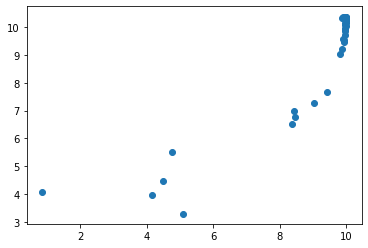

In [353]:
plt.scatter(y_test * 10, predict * 10)

2° Prever

In [250]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(df.columns[prever], axis=1), 
                                                    df.iloc[:,prever[1]], test_size=0.30)

In [251]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(x_train, y_train)
predict = lm1.predict(x_test)

lm1.coef_

array([-0.04648107, -0.81670471, -0.07441948,  0.00894677])

In [238]:
res = []
y_true = y_test.to_list()

mini =  999
maxi = -999

i = 0

for i in range(0, len(predict)):
    n = []
    
    n.append(y_true[i])
    n.append(predict[i])
    res.append(n)
    
res

[[0.004504998576877225, 0.041901725846363556],
 [0.11760002572665441, 0.042137782984599366],
 [0.055490905394362224, 0.03655891357742823],
 [0.027959652691962177, 0.0415994176871642],
 [0.06565962568575046, 0.04144982405815408],
 [0.008036691521765685, 0.04059133981854315],
 [0.01834484995181934, 0.03261403603593463],
 [0.045836233462474577, 0.042012795213023806],
 [0.01431893879510385, 0.041687797476144976],
 [0.012821183584169569, 0.059469340991523185],
 [0.06091852202699547, 0.04205261739911905],
 [0.055063266542289546, 0.04154485730008951],
 [0.03331571262342732, 0.03998332349875536],
 [0.012042752772044195, 0.04171109976663883],
 [0.0015527235214268618, 0.03546145803420321],
 [0.0054970467103456315, 0.04179186271563523],
 [0.06608266246510038, 0.04194629261253316],
 [0.02534083620186718, 0.04202855167974772],
 [0.0728941356942453, 0.03326472402900297],
 [0.040870498495223145, 0.036718785290457426],
 [0.07785250173710113, 0.04220849664985308],
 [0.01162378817632561, 0.0403342162529

In [263]:
df

,Cases,Deaths,Demographic_Density,"Hospital beds (per 1,000 people)",Population ages 65 and above (% of total population),Urban population (% of total population)
0,9267,646,16.962382,1.9,6.362497,72.629
1,84,4,20.749178,0.8,2.216374,65.514
2,16214,528,15.677744,5.0,11.117789,91.870
3,8927,127,100.675789,4.2,11.253818,63.149
4,7192,103,3.135372,3.8,15.656475,86.012
...,...,...,...,...,...,...
117,852,46,98.628952,0.4,2.966556,42.055
118,6,0,406.685783,4.7,19.196193,91.490
119,279,4,142.069056,1.3,2.645435,16.937
120,479,12,194.352697,2.9,2.925678,72.803


# Classificando novos dados

In [492]:
def classify(dd, hb, pa, up):
    df_test = normalizer.transform([[dd, hb, pa, up]])
    df_test = pd.DataFrame(df_test)
    
    predict = lm0.predict(df_test)
    
    mudanca = 0
    menorDiferencaSegura = 9999
    menorDiferenca = 9999
    resulMaisProximo = 0
    
    for i in range(0, len(df.index)-1):
       
        dife = abs(df.iloc[i, 0] - predict[0])
        
        if df.iloc[i, -1] == 'Below' and dife < menorDiferencaSegura:
            menorDiferencaSegura = dife
            maiorSubDif = -1
            
            for ii in range(0, len(df.columns) - 3):
                subDif = abs(df.iloc[i, ii + 2] - df_test.iloc[0, ii])
                
                if subDif > maiorSubDif:
                    maiorSubDif = subDif
                    
                    if df.iloc[i, ii + 2] > df_test.iloc[0, ii]:
                        mudanca = -(ii + 1)
                    else:
                        mudanca = ii + 1
            
        if dife < menorDiferenca:
            menorDiferenca = dife
            resulMaisProximo = df.iloc[i, -1]
            
    return [resulMaisProximo, mudanca]

In [493]:
classify(0.001826, 0.000205, 0.001909, 0.097818)

['Below', 4]

In [452]:
df_test = normalizer.transform([[0.001826, 0.000205, 0.001909, 0.007818]])
df_test = pd.DataFrame(df_test)
df_test

,0,1,2,3
0,0.221205,0.024834,0.231259,0.947085


In [453]:
df.iloc[2:, 2:-1]

,Demographic_Density,"Hospital beds (per 1,000 people)",Population density (people per sq. km of land area),Urban population (% of total population)
2,0.000966,0.000308,0.001002,0.005663
3,0.011275,0.000470,0.011611,0.007072
4,0.000436,0.000528,0.000452,0.011957
5,0.006230,0.000455,0.006415,0.003491
6,0.021405,0.000895,0.022905,0.010607
...,...,...,...,...
117,0.113830,0.000462,0.122322,0.048537
118,0.616311,0.007123,0.775115,0.138648
119,0.386145,0.003533,0.523055,0.046035
120,0.343041,0.005119,0.387994,0.128501


In [475]:
df.iloc[1, -1]

'Below'

In [469]:
len(df.index)-1

121